In [8]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import os
from workalendar.europe import Germany
from datetime import date, timedelta
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
import pvlib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import torch
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [9]:
input_directory = 'E:\TH-Koeln University\Semester 3\Hyperparameter tuning\Dataset\pv_1.csv'

df = pd.read_csv(input_directory, index_col='timestampUtc', parse_dates=True)
df.index = df.index.strftime('%Y-%m-%d %H:%M')
df.index = pd.to_datetime(df.index)

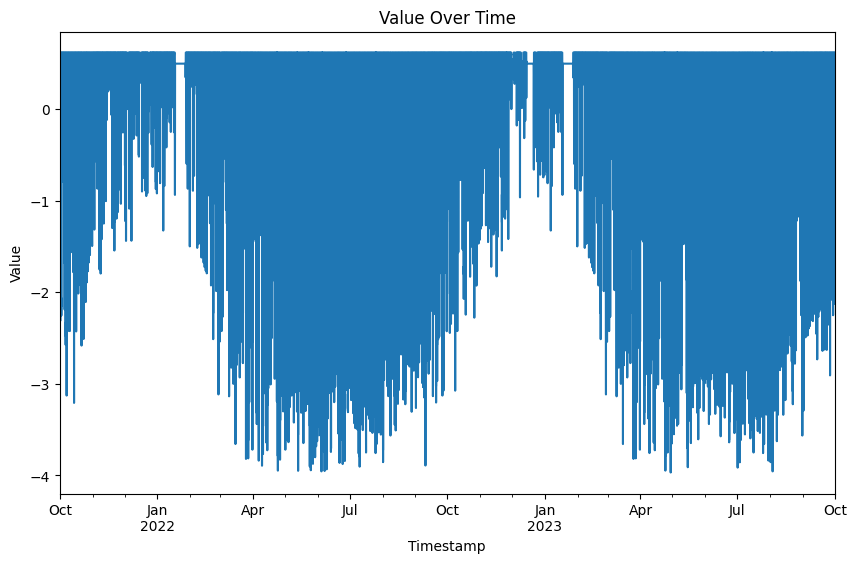

In [11]:
import numpy as np
import pandas as pd

dataset = df.copy()

for i in range(2):
    
    missing_values = dataset['value'].isnull()
    
    for missing_index in dataset.index[missing_values]:
        missing_timestamp = missing_index

        data_2022_date = df.loc[missing_index]

        year = missing_timestamp.year
        month = missing_timestamp.month
        day = missing_timestamp.day
        hour = missing_timestamp.hour
        minute = missing_timestamp.minute    

        if year < 2023:
            year += 1
        elif year >= 2023:
            year -= 1

        adjusted_timestamp = pd.Timestamp(year, month, day, hour, minute)
            
        if adjusted_timestamp in dataset.index:
            adjusted_value = dataset.loc[adjusted_timestamp, 'value']
            dataset.loc[missing_index, 'value'] = adjusted_value

import matplotlib.pyplot as plt
dataset['value'].ffill(inplace=True)
dataset['value'].plot(figsize=(10, 6), title='Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()
